## Pandas
 * Series
 * DataFrame

In [3]:
# Series
import pandera as pa
import pandas as pd

data: pd.Series = pd.Series([1, 2, 3, 4, 5])
print(data)

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [5]:
values: list[int] = [1, 2, 3, 4, 5]
ind: list[list[str]] = [["a1", "a1", "a2", "a2", "a3"],
                        ["a", "b", "c", "d", "e"]]

data: pd.Series = pd.Series(values, index=ind)
print(data)


a1  a    1
    b    2
a2  c    3
    d    4
a3  e    5
dtype: int64


In [21]:
# DataFrame 

import pandera as pa
import pandas as pd

df: pd.DataFrame = pd.DataFrame([[1, 2, 3, 4, 5],[6, 7, 8, 9, 10],[11, 12, 13, 14, 15]], index=[1, 2, 3], columns=["a", "b", "c", "d", "e"],)
print(df)

id: pd.Series = pd.Series([1, 2, 3, 4, 5], name="Student_id")
score: pd.Series = pd.Series([90, 80, 70, 60, 50], name="Score")
name: pd.Series = pd.Series(["Hijabie", "Ahsaan", "Abbasi", "Gossipie", "Alizay"], name="Name")

# dfe: pd.DataFrame = pd.DataFrame({"Student_id": id, "Score": score, "Name": name})
# print(dfe)

dfe: pd.DataFrame = pd.concat([id,score,name],axis=1)
dfe

    a   b   c   d   e
1   1   2   3   4   5
2   6   7   8   9  10
3  11  12  13  14  15


,Student_id,Score,Name
0,1,90,Hijabie
1,2,80,Ahsaan
2,3,70,Abbasi
3,4,60,Gossipie
4,5,50,Alizay


In [26]:
import numpy as np
from nptyping import NDArray,Shape, Int64

data: NDArray[Shape["10, 10"], Int64] = np.arange(10*10).reshape(10,10)

df: pd.DataFrame = pd.DataFrame(data, columns=list("ABCDEFGHIJ"), index=list("KLMNOPQRST"))
df

,A,B,C,D,E,F,G,H,I,J
K,0,1,2,3,4,5,6,7,8,9
L,10,11,12,13,14,15,16,17,18,19
M,20,21,22,23,24,25,26,27,28,29
N,30,31,32,33,34,35,36,37,38,39
O,40,41,42,43,44,45,46,47,48,49
P,50,51,52,53,54,55,56,57,58,59
Q,60,61,62,63,64,65,66,67,68,69
R,70,71,72,73,74,75,76,77,78,79
S,80,81,82,83,84,85,86,87,88,89
T,90,91,92,93,94,95,96,97,98,99


In [30]:
df: list[pd.DataFrame] = pd.read_html("https://www.w3schools.com/python/python_operators.asp")
df[1]

,Operator,Example,Same As,Try it
0,=,x = 5,x = 5,Try it »
1,+=,x += 3,x = x + 3,Try it »
2,-=,x -= 3,x = x - 3,Try it »
3,*=,x *= 3,x = x * 3,Try it »
4,/=,x /= 3,x = x / 3,Try it »
5,%=,x %= 3,x = x % 3,Try it »
6,//=,x //= 3,x = x // 3,Try it »
7,**=,x **= 3,x = x ** 3,Try it »
8,&=,x &= 3,x = x & 3,Try it »
9,|=,x |= 3,x = x | 3,Try it »


In [31]:
df: pd.DataFrame = pd.read_json("https://www.w3schools.com/python/pandas/data.js")
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.4
166,60,115,145,310.2
167,75,120,150,320.4


In [52]:
data: pd.DataFrame = pd.DataFrame({
    "column1": [1, 2, 3, 4, 5],
    "column2": [5.0, 6.6, 6.5, 8.1, 10.0],
}, index=["row1", "row2", "row3", "row4", "row5"])

schema = pa.DataFrameSchema({
    "column1": pa.Column(int, checks=pa.Check.le(10)),
    "column2": pa.Column(float, checks=pa.Check.lt(40)),
})

validated_df = schema(data)
print(validated_df)

      column1  column2
row1        1      5.0
row2        2      6.6
row3        3      6.5
row4        4      8.1
row5        5     10.0


## Slicing and Indexing Data

In [67]:
s1: pd.Series = pd.Series([1, 2, 3, 4, 5],index=["a","b","c","d","e"] )
s1[0:3]

s1.iloc[0:3]
s1.loc["a":"d"]
s1.iat[1]
s1.at["e"]


5

In [79]:
import re
import pandas as pd

grades = """
Mubeen: PIAIC-394944
Hammad: PIAIC 394943
Muhammad: PIAIC-394942
Hijabie: PIAIC-394945
"""

patterns = r"([A-Z][a-z]+): (PIAIC-? ?\d{5,6})"  # Using raw string (r"") to avoid escaping issues

data = re.findall(patterns, grades)

df = pd.DataFrame(data, columns=["Name", "ID"])
df

,Name,ID
0,Mubeen,PIAIC-394944
1,Hammad,PIAIC 394943
2,Muhammad,PIAIC-394942
3,Hijabie,PIAIC-394945


In [88]:
# DataFrame: employees
# +-------------+--------+
# | Column Name | Type   |
# +-------------+--------+
# | employee_id | int    |
# | name        | object |
# | department  | object |
# | salary      | int    |
# +-------------+--------+
# Write a solution to display the first 3 rows of this DataFrame.


def selectFirstRows(employees: pd.DataFrame) -> pd.DataFrame:
    employee: pd.DataFrame = pd.DataFrame(employees)
    return employee.head(3)

employees: pd.DataFrame = pd.DataFrame({
    "employee_id": [3, 90, 9, 60, 49, 43,],
    "name": ["Bob", "Alice", "Tatiana", "Annabelle", "Jonathan", "Khaled"],
    "department": ["Operations", "Sales", "Engineering", "InformationTechnology", "HumanResources", "Administration"],
    "salary": [48675, 11096, 33805, 37678, 23793, 40454],
})

selectFirstRows(employees)


,employee_id,name,department,salary
0,3,Bob,Operations,48675
1,90,Alice,Sales,11096
2,9,Tatiana,Engineering,33805


In [98]:
id: pd.Series = pd.Series([1, 2, 3, 4, 5], name="Student_id")
score: pd.Series = pd.Series([90, 80, 70, 60, 50], name="Score")
name: pd.Series = pd.Series(["Hijabie", "Ahsaan", "Abbasi", "Gossipie", "Alizay"], name="Name")

dfe: pd.DataFrame = pd.DataFrame({"Student_id": id, "Score": score, "Name": name})
# Assuming row indexing starts from 0
score_of_row_2 = dfe.loc[2, 'Score']
print("Score of row 2:", score_of_row_2)

# Slice multiple rows and only the 'Score' column
scores_of_rows_2_to_4 = dfe.loc[2:4, 'Score']
print("Scores of rows 2 to 4:")
print(scores_of_rows_2_to_4)

# Slice multiple rows and Select Multiple column
scores_of_rows_2_to_4 = dfe.loc[2:4, ['Score', 'Name']]
print("Scores of rows 2 to 4:")
print(scores_of_rows_2_to_4)



Score of row 2: 70
Scores of rows 2 to 4:
2    70
3    60
4    50
Name: Score, dtype: int64
Scores of rows 2 to 4:
   Score      Name
2     70    Abbasi
3     60  Gossipie
4     50    Alizay


In [3]:
# DataFrame players:
# +-------------+--------+
# | Column Name | Type   |
# +-------------+--------+
# | player_id   | int    |
# | name        | object |
# | age         | int    |
# | position    | object |
# | ...         | ...    |
# +-------------+--------+
# Write a solution to calculate and display the number of rows and columns of players.

# Return the result as an array:

# [number of rows, number of columns]
import pandas as pd

def getDataframeSize(players: pd.DataFrame) -> list[int]:
    dplayer: pd.DataFrame = pd.DataFrame(players)
    return [dplayer.shape[0], dplayer.shape[1]]

players: pd.DataFrame = pd.DataFrame({
    "player_id": [1, 2, 3, 4, 5,],
    "name": ["Hijabie", "Ahsaan", "Abbasi", "Gossipie", "Alizay"],
    "age": [22, 23, 24, 25, 26],
    "position": ["GK", "GK", "GK", "GK", "GK"],
    "club": ["Liverpool", "Liverpool", "Liverpool", "Liverpool", "Liverpool"],
})

getDataframeSize(players)

[5, 5]

In [9]:
# Pandas Data Manipulation
import pandas as pd
import pandera as pa
import numpy as np
from nptyping import NDArray, Shape, Int64

total: int = 100
s1: NDArray[Shape[str(total)+"5"], Int64] = np.random.randint(80, 100, (total, 5))
ss1: pd.DataFrame = pd.DataFrame(s1, columns=["S1", "S2", "S3", "S4", "S5"])
s2: NDArray[Shape[str(total) + "5"], Int64] = np.random.randint(70,79, (total, 5))
ss2: pd.DataFrame = pd.DataFrame(s2, columns=["S1", "S2", "S3", "S4", "S5"])
s3: NDArray[Shape[str(total) + "5"], Int64] = np.random.randint(60,69, (total, 5))
ss3: pd.DataFrame = pd.DataFrame(s3, columns=["S1", "S2", "S3", "S4", "S5"])
s4: NDArray[Shape[str(total) + "5"], Int64] = np.random.randint(50,59, (total, 5))
ss4: pd.DataFrame = pd.DataFrame(s4, columns=["S1", "S2", "S3", "S4", "S5"])
s5: NDArray[Shape[str(total) + "5"], Int64] = np.random.randint(40,49, (total, 5))
ss5: pd.DataFrame = pd.DataFrame(s5, columns=["S1", "S2", "S3", "S4", "S5"])
s6: NDArray[Shape[str(total) + "5"], Int64] = np.random.randint(0,39, (total, 5))
ss6: pd.DataFrame = pd.DataFrame(s6, columns=["S1", "S2", "S3", "S4", "S5"])

print(len(ss1))
print(len(ss2))
print(len(ss3))
print(len(ss4))
print(len(ss5))
print(len(ss6))


100
100
100
100
100
100


In [59]:
df: pd.DataFrame = pd.concat([ss1, ss2, ss3, ss4, ss5, ss6])
df
# display(df.info())
# display(df.describe())
# display(df.head())
# display(df.tail())

,S1,S2,S3,S4,S5
0,92,91,96,91,89
1,88,81,87,85,89
2,97,97,91,89,97
3,93,93,91,88,80
4,88,96,98,96,94
...,...,...,...,...,...
95,14,6,11,22,32
96,33,9,20,17,36
97,13,19,33,30,28
98,7,6,18,13,36


In [60]:
df.to_csv("student.csv", index=False)
df1 : pd.DataFrame = pd.read_csv("./student.csv")
df1.head()

,S1,S2,S3,S4,S5
0,92,91,96,91,89
1,88,81,87,85,89
2,97,97,91,89,97
3,93,93,91,88,80
4,88,96,98,96,94


In [20]:
df["S5"]
df.S4
df[["S1", "S2", "S3"]]
df["Total"] = 500
df

,S1,S2,S3,S4,S5,Total
0,92,91,96,91,89,500
1,88,81,87,85,89,500
2,97,97,91,89,97,500
3,93,93,91,88,80,500
4,88,96,98,96,94,500
...,...,...,...,...,...,...
95,14,6,11,22,32,500
96,33,9,20,17,36,500
97,13,19,33,30,28,500
98,7,6,18,13,36,500


In [22]:
df["Obtained Marks"] = df["S1"] + df["S2"] + df["S3"] + df["S4"] + df["S5"]
df["Percentage"] = df['Obtained Marks'] / df["Total"] * 100
df

,S1,S2,S3,S4,S5,Total,Obtained Marks,Percentage
0,92,91,96,91,89,500,459,91.8
1,88,81,87,85,89,500,430,86.0
2,97,97,91,89,97,500,471,94.2
3,93,93,91,88,80,500,445,89.0
4,88,96,98,96,94,500,472,94.4
...,...,...,...,...,...,...,...,...
95,14,6,11,22,32,500,85,17.0
96,33,9,20,17,36,500,115,23.0
97,13,19,33,30,28,500,123,24.6
98,7,6,18,13,36,500,80,16.0


In [23]:
def grades(per:int)->str:
    if per >= 80:
        return "A+"
    elif per >= 70:
        return "A"
    elif per >= 60:
        return "B"
    elif per >= 50:
        return "C"
    elif per >= 40:
        return "D"
    else:
        return "F"

df["Grade"] = df["Percentage"].apply(grades)
df

,S1,S2,S3,S4,S5,Total,Obtained Marks,Percentage,Grade
0,92,91,96,91,89,500,459,91.8,A+
1,88,81,87,85,89,500,430,86.0,A+
2,97,97,91,89,97,500,471,94.2,A+
3,93,93,91,88,80,500,445,89.0,A+
4,88,96,98,96,94,500,472,94.4,A+
...,...,...,...,...,...,...,...,...,...
95,14,6,11,22,32,500,85,17.0,F
96,33,9,20,17,36,500,115,23.0,F
97,13,19,33,30,28,500,123,24.6,F
98,7,6,18,13,36,500,80,16.0,F


In [63]:
df1[0 : 10] # direct sicling apply on  rows index
df1.iloc[1:11 , 1:3] # numpy sicling apply on columns and rows index
df1.loc[1:11, "S1" : "S3"]
df1.at[5, "S3"]
df1.iat[8, 2]

95

In [64]:
def fn_obtained(S1: int, S2: int, S3: int, S4: int, S5: int)->int:
    return S1 + S2 + S3 + S4 + S5

df1["Obtained Marks"] = df1[["S1", "S2", "S3", "S4", "S5"]].apply(lambda x: fn_obtained(*x), axis=1)
df1

,S1,S2,S3,S4,S5,Obtained Marks
0,92,91,96,91,89,459
1,88,81,87,85,89,430
2,97,97,91,89,97,471
3,93,93,91,88,80,445
4,88,96,98,96,94,472
...,...,...,...,...,...,...
595,14,6,11,22,32,85
596,33,9,20,17,36,115
597,13,19,33,30,28,123
598,7,6,18,13,36,80


In [69]:
def fn_obtained(S1: int, S2: int, S3: int, S4: int, S5: int)->tuple[int,int,float,str]:
    total: int = 500
    obtained_score: int = S1 + S2 + S3 + S4 + S5
    per: float = obtained_score / total * 100
    grade: str = ""
    if per >= 80:
        grade = "A+"
    elif per >= 70:
        grade = "A"
    elif per >= 60:
        grade ="B"
    elif per >= 50:
        grade = "C"
    elif per >= 40:
        grade = "D"
    else:
        grade = "F"
    return total, obtained_score, per, grade

df1[["Total","Obtained Marks","Percentage", "Grade"]] = df1[["S1", "S2", "S3", "S4", "S5"]].apply(lambda x: fn_obtained(*x), axis=1, result_type="expand")
df1

,S1,S2,S3,S4,S5,Obtained Marks,Total,Percentage,Grade
0,92,91,96,91,89,459,500,91.8,A+
1,88,81,87,85,89,430,500,86.0,A+
2,97,97,91,89,97,471,500,94.2,A+
3,93,93,91,88,80,445,500,89.0,A+
4,88,96,98,96,94,472,500,94.4,A+
...,...,...,...,...,...,...,...,...,...
595,14,6,11,22,32,85,500,17.0,F
596,33,9,20,17,36,115,500,23.0,F
597,13,19,33,30,28,123,500,24.6,F
598,7,6,18,13,36,80,500,16.0,F


In [70]:
from typing import Dict
remarks: Dict[str,str] = {
    "A+": "Excellent",
    "A": "Good",
    "B": "Average",
    "C": "Below Average",
    "D": "Poor",
    "F": "Fail",
}
df1["Remarks"] = df1.Grade.map(remarks)
df1

,S1,S2,S3,S4,S5,Obtained Marks,Total,Percentage,Grade,Remarks
0,92,91,96,91,89,459,500,91.8,A+,Excellent
1,88,81,87,85,89,430,500,86.0,A+,Excellent
2,97,97,91,89,97,471,500,94.2,A+,Excellent
3,93,93,91,88,80,445,500,89.0,A+,Excellent
4,88,96,98,96,94,472,500,94.4,A+,Excellent
...,...,...,...,...,...,...,...,...,...,...
595,14,6,11,22,32,85,500,17.0,F,Fail
596,33,9,20,17,36,115,500,23.0,F,Fail
597,13,19,33,30,28,123,500,24.6,F,Fail
598,7,6,18,13,36,80,500,16.0,F,Fail


In [78]:
# Type Casting
df1["S1"] = df1["S1"].astype(np.int32)
# df1["S2"] = df1["S2"].apply(np.int64)
# df1.info()


In [92]:
# DataFrame students
# +-------------+--------+
# | Column Name | Type   |
# +-------------+--------+
# | student_id  | int    |
# | name        | object |
# | age         | int    |
# +-------------+--------+

# Write a solution to select the name and age of the student with student_id = 101
import pandas as pd

def selectData(students: pd.DataFrame, student_id: int) -> pd.DataFrame:
    student: pd.DataFrame = pd.DataFrame(students, columns=["student_id", "name", "age"])
    return student.loc[students['student_id'] == student_id, ['name', 'age']]

students: pd.DataFrame = pd.DataFrame({
    "student_id": [101, 102, 103, 104, 105],
    "name": ["Hijabie", "Ahsaan", "Abbasi", "Gossipie", "Alizay"],
    "age": [22, 23, 24, 25, 26],
})

dId: int = 101
selectData(students,dId)



,name,age
0,Hijabie,22


In [93]:
# DataFrame employees
# +-------------+--------+
# | Column Name | Type.  |
# +-------------+--------+
# | name        | object |
# | salary      | int.   |
# +-------------+--------+
# A company plans to provide its employees with a bonus.

# Write a solution to create a new column name bonus that contains the doubled values of the salary column.
def createBonusColumn(employees: pd.DataFrame) -> pd.DataFrame:
    employee: pd.DataFrame = pd.DataFrame(employees, columns=["name", "salary"])
    employee["bonus"] = employee["salary"] * 2
    return employee

employees: pd.DataFrame = pd.DataFrame({
    "name": ["Hijabie", "Ahsaan", "Abbasi", "Gossipie", "Alizay"],
    "salary": [22000, 23000, 24000, 25000, 26000],
})

createBonusColumn(employees)

,name,salary,bonus
0,Hijabie,22000,44000
1,Ahsaan,23000,46000
2,Abbasi,24000,48000
3,Gossipie,25000,50000
4,Alizay,26000,52000


In [94]:
# DataFrame students
# +-------------+--------+
# | Column Name | Type   |
# +-------------+--------+
# | student_id  | int    |
# | name        | object |
# | age         | int    |
# | grade       | float  |
# +-------------+--------+
# Write a solution to correct the errors:

# The grade column is stored as floats, convert it to integers.

# The result format is in the following example.
import pandas as pd

def changeDatatype(students: pd.DataFrame) -> pd.DataFrame:
    student: pd.DataFrame = pd.DataFrame(students, columns=["student_id", "name", "age", "grade"])
    student["grade"] = student["grade"].astype(int)
    return student

students: pd.DataFrame = pd.DataFrame({
    "student_id": [101, 102, 103, 104, 105],
    "name": ["Hijabie", "Ahsaan", "Abbasi", "Gossipie", "Alizay"],
    "age": [22, 23, 24, 25, 26],
    "grade": [90.0, 80.0, 70.0, 60.0, 50.0],
})

changeDatatype(students)

,student_id,name,age,grade
0,101,Hijabie,22,90
1,102,Ahsaan,23,80
2,103,Abbasi,24,70
3,104,Gossipie,25,60
4,105,Alizay,26,50


In [95]:
# DataFrame employees
# +-------------+--------+
# | Column Name | Type   |
# +-------------+--------+
# | name        | object |
# | salary      | int    |
# +-------------+--------+
# A company intends to give its employees a pay rise.

# Write a solution to modify the salary column by multiplying each salary by 2.

# The result format is in the following example.
def modifySalaryColumn(employees: pd.DataFrame) -> pd.DataFrame:
    employee: pd.DataFrame = pd.DataFrame(employees, columns=["name", "salary"])
    employee["salary"] = employee["salary"] * 2
    return employee

employees: pd.DataFrame = pd.DataFrame({
    "name": ["Hijabie", "Ahsaan", "Abbasi", "Gossipie", "Alizay"],
    "salary": [22000, 23000, 24000, 25000, 26000],
})

modifySalaryColumn(employees)

,name,salary
0,Hijabie,44000
1,Ahsaan,46000
2,Abbasi,48000
3,Gossipie,50000
4,Alizay,52000


In [100]:
# DataFrame students
# +-------------+--------+
# | Column Name | Type   |
# +-------------+--------+
# | student_id  | int    |
# | name        | object |
# | age         | int    |
# +-------------+--------+
# There are some rows having missing values in the name column.

# Write a solution to remove the rows with missing values.

# The result format is in the following example.
# def dropMissingData(students: pd.DataFrame) -> pd.DataFrame:
#     student: pd.DataFrame = pd.DataFrame(students, columns=["student_id", "name", "age"])
#     student = student.dropna()
#     return student

# students: pd.DataFrame = pd.DataFrame({
#     "student_id": [101, 102, 103, 104, 105],
#     "name": ["Hijabie", "Ahsaan", None, "Gossipie", "Alizay"],
#     "age": [22, 23, 24, 25, 26],
# })

# dropMissingData(students)
def dropMissingData(students: pd.DataFrame) -> pd.DataFrame:
    student: pd.DataFrame = pd.DataFrame(students, columns=["student_id", "name", "age"])
    student = student.dropna(subset=["name"])
    return student

students: pd.DataFrame = pd.DataFrame({
    "student_id": [101, 102, 103, 104, 105],
    "name": [None, None, "Hijabie", "Ahsaan", "Alizay"],
    "age": [22, 23, 24, 25, None],
})

dropMissingData(students)

,student_id,name,age
2,103,Hijabie,24.0
3,104,Ahsaan,25.0
4,105,Alizay,NaN


In [104]:
# DataFrame products
# +-------------+--------+
# | Column Name | Type   |
# +-------------+--------+
# | name        | object |
# | quantity    | int    |
# | price       | int    |
# +-------------+--------+
# Write a solution to fill in the missing value as 0 in the quantity column.
import pandas as pd

def fillMissingValues(products: pd.DataFrame) -> pd.DataFrame:
    product: pd.DataFrame = pd.DataFrame(products, columns=["name", "quantity", "price"])
    product["quantity"] = product["quantity"].fillna(0)
    return product

products: pd.DataFrame = pd.DataFrame({
    "name": ["Mobile", "Watch", "Headphones", "Buds", "Oil"],
    "quantity": [0, 0, 4, 5, 3],
    "price": [2200, 2300, 2400, 2500, 2600],
})

fillMissingValues(products)

,name,quantity,price
0,Mobile,0,2200
1,Watch,0,2300
2,Headphones,4,2400
3,Buds,5,2500
4,Oil,3,2600


In [3]:
from pandera.typing import Series
from datetime import datetime
import pandera as pa
import pandas as pd

class StudentSchema(pa.SchemaModel):
    roll_no: Series[int] = pa.Field(ge=1)
    name: Series[str] = pa.Field(nullable=False)
    father: Series[str] = pa.Field(nullable=False)
    course: Series[str] = pa.Field(nullable=False)
    date_of_admission: Series[datetime] = pa.Field(le=datetime.now())
    fee: Series[int] = pa.Field(ge=0)
    class Config: 
        coerce = True
        strict = True

students_data = [
    {"roll_no": 1, "name": "Hijabie", "father": "M.Arshad", "course": "Physics", "date_of_admission": "2022-01-02", "fee": 10000},
    {"roll_no": 2, "name": "M.Ahsaan Abbasi", "father": "M.Israr", "course": "A.I", "date_of_admission": "2022-12-23", "fee": 12000},
    {"roll_no": 3, "name": "Zyab", "father": "Rizwan", "course": "Computer Science", "date_of_admission": "2022-03-03", "fee": 130000},
    {"roll_no": 4, "name": "Alizay", "father": "M.Ali", "course": "Pharmacy", "date_of_admission": "2022-04-14", "fee": 140000},
    {"roll_no": 5, "name": "Ali", "father": "Razzaq", "course": "Math", "date_of_admission": "2022-05-08", "fee": 150000},
    {"roll_no": 6, "name": "Abbasi", "father": "Ali", "course": "A.I", "date_of_admission": "2022-06-05", "fee": 160000},
    {"roll_no": 7, "name": "Abbas", "father": "Abrrar", "course": "A.I", "date_of_admission": "2022-11-15", "fee": 170000},
    {"roll_no": 8, "name": "Abdulrahman", "father": "Faizan", "course": "Generics", "date_of_admission": "2022-10-12", "fee": 180000},
    {"roll_no": 9, "name": "Mikail", "father": "Sher", "course": "Urdu", "date_of_admission": "2022-09-20", "fee": 180000},
    {"roll_no": 10, "name": "Humna", "father": "AbdulHameed", "course": "Generics", "date_of_admission": "2022-11-22", "fee": 180000},
]

students_df: pd.DataFrame = pd.DataFrame(students_data)
students_df["date_of_admission"] = pd.to_datetime(students_df["date_of_admission"])
validated_df = StudentSchema.validate(students_df)
# print(validated_df)
students_df

,roll_no,name,father,course,date_of_admission,fee
0,1,Hijabie,M.Arshad,Physics,2022-01-02,10000
1,2,M.Ahsaan Abbasi,M.Israr,A.I,2022-12-23,12000
2,3,Zyab,Rizwan,Computer Science,2022-03-03,130000
3,4,Alizay,M.Ali,Pharmacy,2022-04-14,140000
4,5,Ali,Razzaq,Math,2022-05-08,150000
5,6,Abbasi,Ali,A.I,2022-06-05,160000
6,7,Abbas,Abrrar,A.I,2022-11-15,170000
7,8,Abdulrahman,Faizan,Generics,2022-10-12,180000
8,9,Mikail,Sher,Urdu,2022-09-20,180000
9,10,Humna,AbdulHameed,Generics,2022-11-22,180000


# Filters iN Pandas

In [17]:
students_df.course.value_counts() # Simply Count the Value
students_df.course.value_counts(dropna=False) # Count the Value with NaN
students_df.course.value_counts(normalize=True) # Count and distribute the value in Percentage
students_df.course.value_counts(normalize=True)*100

course
A.I                 30.0
Generics            20.0
Physics             10.0
Computer Science    10.0
Pharmacy            10.0
Math                10.0
Urdu                10.0
Name: proportion, dtype: float64

### Cut and Qcut

In [21]:
import numpy as np

np.random.seed(0)
num_transactions: int = 500
from datetime import timedelta

current_year = datetime.now().year
start_date = datetime(current_year, 1, 1)
end_date = datetime.now()

random_dates = [start_date + timedelta(days=np.random.randint(0, (end_date - start_date).days))
                for _ in range(num_transactions)]

random_fees = np.random.randint(100, 5000, num_transactions)
fees_transaction_df = pd.DataFrame({"date": random_dates, "fee": random_fees})

fees_transaction_df.sort_values("date", inplace=True)
fees_transaction_df.reset_index(drop=True, inplace=True)

fees_transaction_df

,date,fee
0,2024-01-01,1538
1,2024-01-01,625
2,2024-01-01,3372
3,2024-01-01,3786
4,2024-01-01,475
...,...,...
495,2024-03-04,4802
496,2024-03-04,677
497,2024-03-04,2480
498,2024-03-04,2810


In [24]:
pd.cut(fees_transaction_df.fee, 
    bins=[100, 500, 1000, 2000, 3000, 4000, 5000], 
    labels=["0.1k-0.5k", "0.5k-1k", "1k-2k", "2k-3k", "3k-4k", "4k-5k"]).value_counts()
pd.cut(fees_transaction_df.fee, 
    bins=[100, 500, 1000, 2000, 3000, 4000, 5000], 
    labels=["0.1k-0.5k", "0.5k-1k", "1k-2k", "2k-3k", "3k-4k", "4k-5k"]).value_counts(normalize=True)* 100

fee
3k-4k        22.289157
2k-3k        21.084337
1k-2k        19.277108
4k-5k        18.273092
0.5k-1k      11.445783
0.1k-0.5k     7.630522
Name: proportion, dtype: float64

In [27]:
pd.qcut(fees_transaction_df.fee,
        [0, 0.3, .5, .7, .8, .9, 1]).value_counts(normalize=True) * 100

fee
(99.999, 1595.7]    30.0
(1595.7, 2516.0]    20.0
(2516.0, 3443.5]    20.0
(3443.5, 3908.6]    10.0
(3908.6, 4478.6]    10.0
(4478.6, 4983.0]    10.0
Name: proportion, dtype: float64

## Filters on Columns 
* &, |, ~ 

In [48]:
students_df[students_df["course"] == "A.I"]
# subject: str = input("Enter the Subject: ").lower()
# students_df[students_df["course"].str.lower() == subject]

students_df[(students_df["course"].str.lower().str.contains("cs") ) | (students_df["course"].str.lower() == "a.i")]

,roll_no,name,father,course,date_of_admission,fee
0,1,Hijabie,M.Arshad,Physics,2022-01-02,10000
1,2,M.Ahsaan Abbasi,M.Israr,A.I,2022-12-23,12000
5,6,Abbasi,Ali,A.I,2022-06-05,160000
6,7,Abbas,Abrrar,A.I,2022-11-15,170000
7,8,Abdulrahman,Faizan,Generics,2022-10-12,180000
9,10,Humna,AbdulHameed,Generics,2022-11-22,180000


In [4]:
students_df[students_df["fee"] > 150000]

,roll_no,name,father,course,date_of_admission,fee
5,6,Abbasi,Ali,A.I,2022-06-05,160000
6,7,Abbas,Abrrar,A.I,2022-11-15,170000
7,8,Abdulrahman,Faizan,Generics,2022-10-12,180000
8,9,Mikail,Sher,Urdu,2022-09-20,180000
9,10,Humna,AbdulHameed,Generics,2022-11-22,180000


In [63]:
# filter on date column

date: datetime = datetime.now()
# date
s1: pd.Series = pd.Series(date)
s1.dt.strftime("%Y %m %d %I %M %S %b %B")

s2: pd.Series = pd.Series(['01-Nov-2023', '01-Oct-2022', '01-Dec-2024'])
s2.apply(lambda x: datetime.strptime(x, "%d-%b-%Y"))

0   2023-11-01
1   2022-10-01
2   2024-12-01
dtype: datetime64[ns]

# GroupBy 
* dataframe.groupby(["col1","col2"])
* dataframe.groupby(["col1","col2"])[["col1","col2"]].aggregate([min, max])
* dataframe.groupby(["col1","col2"])[["col1","col2"]].apply(function())

In [61]:
# groupby
list(students_df.groupby("course"))[0][1]
students_df.groupby("course")

In [6]:
# select students
for group in list(students_df.groupby("course")):
    display(group[0])
    display(group[1])

'A.I'

,roll_no,name,father,course,date_of_admission,fee
1,2,M.Ahsaan Abbasi,M.Israr,A.I,2022-12-23,12000
5,6,Abbasi,Ali,A.I,2022-06-05,160000
6,7,Abbas,Abrrar,A.I,2022-11-15,170000


'Computer Science'

,roll_no,name,father,course,date_of_admission,fee
2,3,Zyab,Rizwan,Computer Science,2022-03-03,130000


'Generics'

,roll_no,name,father,course,date_of_admission,fee
7,8,Abdulrahman,Faizan,Generics,2022-10-12,180000
9,10,Humna,AbdulHameed,Generics,2022-11-22,180000


'Math'

,roll_no,name,father,course,date_of_admission,fee
4,5,Ali,Razzaq,Math,2022-05-08,150000


'Pharmacy'

,roll_no,name,father,course,date_of_admission,fee
3,4,Alizay,M.Ali,Pharmacy,2022-04-14,140000


'Physics'

,roll_no,name,father,course,date_of_admission,fee
0,1,Hijabie,M.Arshad,Physics,2022-01-02,10000


'Urdu'

,roll_no,name,father,course,date_of_admission,fee
8,9,Mikail,Sher,Urdu,2022-09-20,180000


In [11]:
for group in list(students_df.groupby(["course", students_df["date_of_admission"].dt.strftime("%B")])):
    display(group[0])
    display(group[1])

('A.I', 'December')

,roll_no,name,father,course,date_of_admission,fee
1,2,M.Ahsaan Abbasi,M.Israr,A.I,2022-12-23,12000


('A.I', 'June')

,roll_no,name,father,course,date_of_admission,fee
5,6,Abbasi,Ali,A.I,2022-06-05,160000


('A.I', 'November')

,roll_no,name,father,course,date_of_admission,fee
6,7,Abbas,Abrrar,A.I,2022-11-15,170000


('Computer Science', 'March')

,roll_no,name,father,course,date_of_admission,fee
2,3,Zyab,Rizwan,Computer Science,2022-03-03,130000


('Generics', 'November')

,roll_no,name,father,course,date_of_admission,fee
9,10,Humna,AbdulHameed,Generics,2022-11-22,180000


('Generics', 'October')

,roll_no,name,father,course,date_of_admission,fee
7,8,Abdulrahman,Faizan,Generics,2022-10-12,180000


('Math', 'May')

,roll_no,name,father,course,date_of_admission,fee
4,5,Ali,Razzaq,Math,2022-05-08,150000


('Pharmacy', 'April')

,roll_no,name,father,course,date_of_admission,fee
3,4,Alizay,M.Ali,Pharmacy,2022-04-14,140000


('Physics', 'January')

,roll_no,name,father,course,date_of_admission,fee
0,1,Hijabie,M.Arshad,Physics,2022-01-02,10000


('Urdu', 'September')

,roll_no,name,father,course,date_of_admission,fee
8,9,Mikail,Sher,Urdu,2022-09-20,180000


In [20]:
students_df.groupby(["course", students_df["date_of_admission"].dt.strftime("%B")])[["fee"]].agg([len,min,max])

C:\Users\Laptronics.co\AppData\Local\Temp\ipykernel_12304\2761151878.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(["course", students_df["date_of_admission"].dt.strftime("%B")])[["fee"]].agg([len,min,max])
C:\Users\Laptronics.co\AppData\Local\Temp\ipykernel_12304\2761151878.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(["course", students_df["date_of_admission"].dt.strftime("%B")])[["fee"]].agg([len,min,max])


fee                
                                   len     min     max
course           date_of_admission                    
A.I              December            1   12000   12000
                 June                1  160000  160000
                 November            1  170000  170000
Computer Science March               1  130000  130000
Generics         November            1  180000  180000
                 October             1  180000  180000
Math             May                 1  150000  150000
Pharmacy         April               1  140000  140000
Physics          January             1   10000   10000
Urdu             September           1  180000  180000

In [24]:
students_df.groupby(["course", students_df["date_of_admission"].dt.strftime("%B")])[["fee"]].apply(lambda x: x.head(1))

fee
course           date_of_admission          
A.I              December          1   12000
                 June              5  160000
                 November          6  170000
Computer Science March             2  130000
Generics         November          9  180000
                 October           7  180000
Math             May               4  150000
Pharmacy         April             3  140000
Physics          January           0   10000
Urdu             September         8  180000

# Data Visualization

C:\Users\Laptronics.co\AppData\Local\Temp\ipykernel_12304\4255515718.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(["course", students_df["date_of_admission"].dt.strftime("%B")])[["fee"]].agg([len,min,max]).plot()
C:\Users\Laptronics.co\AppData\Local\Temp\ipykernel_12304\4255515718.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(["course", students_df["date_of_admission"].dt.strftime("%B")])[["fee"]].agg([len,min,max]).plot()


<Axes: xlabel='course,date_of_admission'>

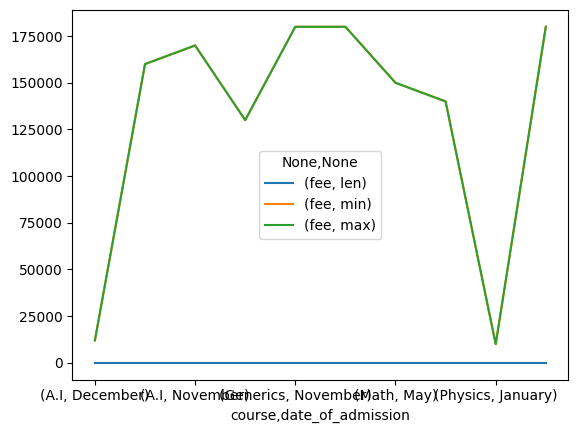

In [25]:
students_df.groupby(["course", students_df["date_of_admission"].dt.strftime("%B")])[["fee"]].agg([len,min,max]).plot()

C:\Users\Laptronics.co\AppData\Local\Temp\ipykernel_12304\3365873800.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(["course", students_df["date_of_admission"].dt.strftime("%B")])[["fee"]].agg([len,min,max]).plot(kind="bar")
C:\Users\Laptronics.co\AppData\Local\Temp\ipykernel_12304\3365873800.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(["course", students_df["date_of_admission"].dt.strftime("%B")])[["fee"]].agg([len,min,max]).plot(kind="bar")


<Axes: xlabel='course,date_of_admission'>

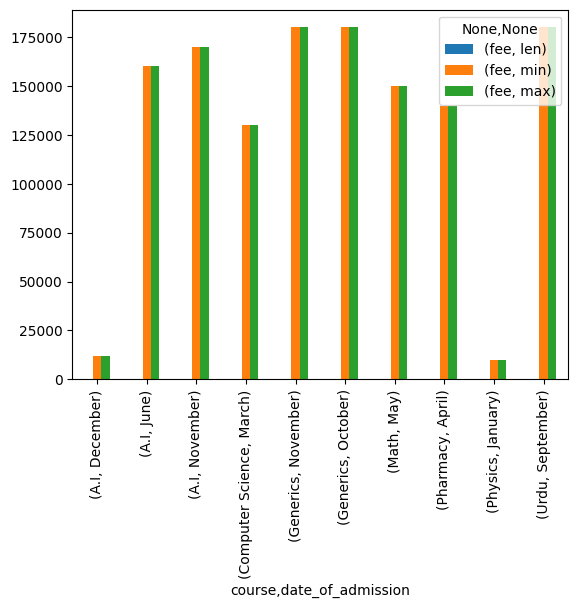

In [29]:
students_df.groupby(["course", students_df["date_of_admission"].dt.strftime("%B")])[["fee"]].agg([len,min,max]).plot(kind="bar")

# Data Wraggling

In [36]:
from typing import Union
students_data: dict[str, list[Union[str,int]]] = {
    "student_id": [1, 2, 3, 4, 5],
    "name": ["Hijabie", "Ahsaan", "Abbasi", "Gossipie", "Alizay"],
    "course_id": [101, 102, 103, 102, 104],
}

teachers_data: dict[str, list[Union[str,int]]] = {
    "course_id": [101, 102, 103, 100],
    "teacher_name": ["Mr.Smith", "Ms.Johnson", "Mr.David", "Dr.lee"]
}

students: pd.DataFrame = pd.DataFrame(students_data)
teachers: pd.DataFrame = pd.DataFrame(teachers_data)

student_fees_data: dict[str, list[Union[str,int]]] = {
    "student_id": [1, 2, 3, 4, 5],
    "fee": [1000, 2000, 3000, 4000, 5000],
}
student_fees: pd.DataFrame = pd.DataFrame(student_fees_data)

df1: pd.DataFrame = pd.merge(students, teachers, on="course_id")
df1

,student_id,name,course_id,teacher_name
0,1,Hijabie,101,Mr.Smith
1,2,Ahsaan,102,Ms.Johnson
2,3,Abbasi,103,Mr.David
3,4,Gossipie,102,Ms.Johnson


In [45]:
# df1: pd.DataFrame = pd.merge(students, teachers, on="course_id", how="right")
# df1
# df1: pd.DataFrame = pd.merge(students, teachers, on="course_id", how="left")
# df1
# df1: pd.DataFrame = pd.merge(students, teachers, on="course_id", how="outer")
# df1
df1: pd.DataFrame = pd.merge(students, teachers, how="cross")
df1

,student_id,name,course_id_x,course_id_y,teacher_name
0,1,Hijabie,101,101,Mr.Smith
1,1,Hijabie,101,102,Ms.Johnson
2,1,Hijabie,101,103,Mr.David
3,1,Hijabie,101,100,Dr.lee
4,2,Ahsaan,102,101,Mr.Smith
5,2,Ahsaan,102,102,Ms.Johnson
6,2,Ahsaan,102,103,Mr.David
7,2,Ahsaan,102,100,Dr.lee
8,3,Abbasi,103,101,Mr.Smith
9,3,Abbasi,103,102,Ms.Johnson


In [55]:
from typing import Union
students_data: dict[str, list[Union[str,int]]] = {
    "student_id": [1, 2, 3, 4, 5],
    "name": ["Hijabie", "Ahsaan", "Abbasi", "Gossipie", "Alizay"],
    "course_id": [101, 102, 103, 102, 104],
}

teachers_data: dict[str, list[Union[str,int]]] = {
    "cid": [101, 102, 103, 100],
    "teacher_name": ["Mr.Smith", "Ms.Johnson", "Mr.David", "Dr.lee"]
}

students: pd.DataFrame = pd.DataFrame(students_data)
teachers: pd.DataFrame = pd.DataFrame(teachers_data)

student_fees_data: dict[str, list[Union[str,int]]] = {
    "fee": [1000, 2000, 3000, 4000, 5000],
    "student_id": [1, 2, 3, 4, 5],
}
student_fees: pd.DataFrame = pd.DataFrame(student_fees_data)

df1: pd.DataFrame = pd.merge(students, teachers, left_on="course_id", right_on="cid")
df1

,student_id,name,course_id,cid,teacher_name
0,1,Hijabie,101,101,Mr.Smith
1,2,Ahsaan,102,102,Ms.Johnson
2,3,Abbasi,103,103,Mr.David
3,4,Gossipie,102,102,Ms.Johnson


In [59]:
df3 : pd.DataFrame = student_fees.groupby(["student_id"]).agg("sum")
df3
df4: pd.DataFrame = pd.merge(students,df3, left_on="student_id", right_index=True, how="outer")
df4

,student_id,name,course_id,fee
0,1,Hijabie,101,1000
1,2,Ahsaan,102,2000
2,3,Abbasi,103,3000
3,4,Gossipie,102,4000
4,5,Alizay,104,5000
